### Building a Technical Analysis Chart with Python
* **Link:** https://medium.com/analytics-vidhya/building-a-technical-analysis-chart-with-python-17107b78b297
* **Method:** Building MACD, MA10,MA30 and RSI charts
  *	Used talib library to get MACD, MA10,MA30 and RSI. Very useful and easy. 
  *	Useful resource for pulling data and plotting it using common trading strategies such as MACD. 
  *	Good as a starting point. 
* **Libraries required:** Talib, mplfinance 
<h3>

We will import pandas for data storage and analysis.
Import datetime and dateutil for filtering data time range
Use talib to get measures sure as moving averages. 
Use mplfinance and matplotlib to plot stock price and indicators

In [9]:
import pandas as pd
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import talib
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
from matplotlib.pylab import date2num

Since we are using the link to get data on a stock, we need to define the to and from date we need the data from. 
To do that get todays date as a UTC timesstamp using datetime.  

In [10]:
today = datetime.today().strftime("%d/%m/%Y")
today = datetime.strptime(today + " +0000", "%d/%m/%Y %z")
to = int(today.timestamp())

Get ten years ago date in the same format too by using relativedelta where you can specify the exact number of years you want to go back from current date.   

In [11]:
ten_yr_ago = today-relativedelta(years=10)
fro = int(ten_yr_ago.timestamp())

Next, we create a function to use the yfinance url to get data for a set stock(ticker) and to and from dates. 
We then create a database using pandas and index it using the dates coloumn to add stock price information.

In [12]:
def get_price_hist(ticker):
    url = "https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={fro}&period2={to}&interval=1d&events=history".format(ticker=ticker, fro=fro, to=to)
    data = pd.read_csv(url)
    data.index = data["Date"].apply(lambda x: pd.Timestamp(x))
    data.drop("Date", axis=1, inplace=True)

    return data

You can then call the function for any stock you want information on. In this case they used Netflix(Nflx)

In [13]:
nflx_df = get_price_hist("NFLX")
nflx_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-04-28,33.285713,34.205715,33.234287,33.481430,33.481430,30851800
2011-04-29,33.257141,33.638573,33.099998,33.238571,33.238571,21412300
2011-05-02,34.031429,34.267143,33.485714,33.884285,33.884285,35550200
2011-05-03,33.669998,33.705715,32.571430,33.034286,33.034286,32200000
2011-05-04,33.114285,33.142857,32.185715,32.741428,32.741428,33527900
...,...,...,...,...,...,...
2021-04-21,508.000000,515.460022,503.600006,508.899994,508.899994,22897400
2021-04-22,513.820007,513.960022,500.549988,508.779999,508.779999,9061100
2021-04-23,509.010010,509.700012,500.700012,505.549988,505.549988,7307700


We then create a function to get indicators such as MACD, simple moving average and RSI. 
* When using Talib, it automatically gets the MACD, its signal(the 9day exponetial moving average) and a coloumn which helps plot a histogram showing the difference between MACD and its signal. 
* Using talib, you can calculate any indicators by calling their functions. such as talib.MA()

In [14]:
def get_indicators(data):
    data["macd"], data["macd_signal"], data["macd_hist"] = talib.MACD(data['Close'])
    
    # Get MA10 and MA30
    data["ma10"] = talib.MA(data["Close"], timeperiod=10)
    data["ma30"] = talib.MA(data["Close"], timeperiod=30)
    
    # Get RSI
    data["rsi"] = talib.RSI(data["Close"])
    return data

nflx_df2 = get_indicators(nflx_df)
nflx_df2

,Open,High,Low,Close,Adj Close,Volume,macd,macd_signal,macd_hist,ma10,ma30,rsi
Date,,,,,,,,,,,,
2011-04-28,33.285713,34.205715,33.234287,33.481430,33.481430,30851800,NaN,NaN,NaN,NaN,NaN,NaN
2011-04-29,33.257141,33.638573,33.099998,33.238571,33.238571,21412300,NaN,NaN,NaN,NaN,NaN,NaN
2011-05-02,34.031429,34.267143,33.485714,33.884285,33.884285,35550200,NaN,NaN,NaN,NaN,NaN,NaN
2011-05-03,33.669998,33.705715,32.571430,33.034286,33.034286,32200000,NaN,NaN,NaN,NaN,NaN,NaN
2011-05-04,33.114285,33.142857,32.185715,32.741428,32.741428,33527900,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21,508.000000,515.460022,503.600006,508.899994,508.899994,22897400,3.410633,5.119384,-1.708751,546.509000,530.231001,38.755005
2021-04-22,513.820007,513.960022,500.549988,508.779999,508.779999,9061100,0.669057,4.229319,-3.560262,541.928998,530.372334,38.716985
2021-04-23,509.010010,509.700012,500.700012,505.549988,505.549988,7307700,-1.744191,3.034617,-4.778808,536.952997,529.788667,37.646381


Once we have our historical data on the Netflix stock and all the indicators, we can create a function to plot them using matplotlib and mpl finance. 

In [15]:
def plot_chart(data, n, ticker):
    
    # Filter number of observations to plot
    data = data.iloc[-n:]
    
    # Create figure and set axes for subplots
    fig = plt.figure()
    fig.set_size_inches((20, 16))
    ax_candle = fig.add_axes((0, 0.72, 1, 0.32))
    ax_macd = fig.add_axes((0, 0.48, 1, 0.2), sharex=ax_candle)
    ax_rsi = fig.add_axes((0, 0.24, 1, 0.2), sharex=ax_candle)
    ax_vol = fig.add_axes((0, 0, 1, 0.2), sharex=ax_candle)
    
    # Format x-axis ticks as dates
    ax_candle.xaxis_date()
    
    # Get nested list of date, open, high, low and close prices
    ohlc = []
    for date, row in data.iterrows():
        openp, highp, lowp, closep = row[:4]
        ohlc.append([date2num(date), openp, highp, lowp, closep])
 
    # Plot candlestick chart
    ax_candle.plot(data.index, data["ma10"], label="MA10")
    ax_candle.plot(data.index, data["ma30"], label="MA30")
    candlestick_ohlc(ax_candle, ohlc, colorup="g", colordown="r", width=0.8)
    ax_candle.legend()
    
    # Plot MACD
    ax_macd.plot(data.index, data["macd"], label="macd")
    ax_macd.bar(data.index, data["macd_hist"] * 3, label="hist")
    ax_macd.plot(data.index, data["macd_signal"], label="signal")
    ax_macd.legend()
    
    # Plot RSI
    # Above 70% = overbought, below 30% = oversold
    ax_rsi.set_ylabel("(%)")
    ax_rsi.plot(data.index, [70] * len(data.index), label="overbought")
    ax_rsi.plot(data.index, [30] * len(data.index), label="oversold")
    ax_rsi.plot(data.index, data["rsi"], label="rsi")
    ax_rsi.legend()
    
    # Show volume in millions
    ax_vol.bar(data.index, data["Volume"] / 1000000)
    ax_vol.set_ylabel("(Million)")
   
    
   
    plt.show()

Call the function with desired stock

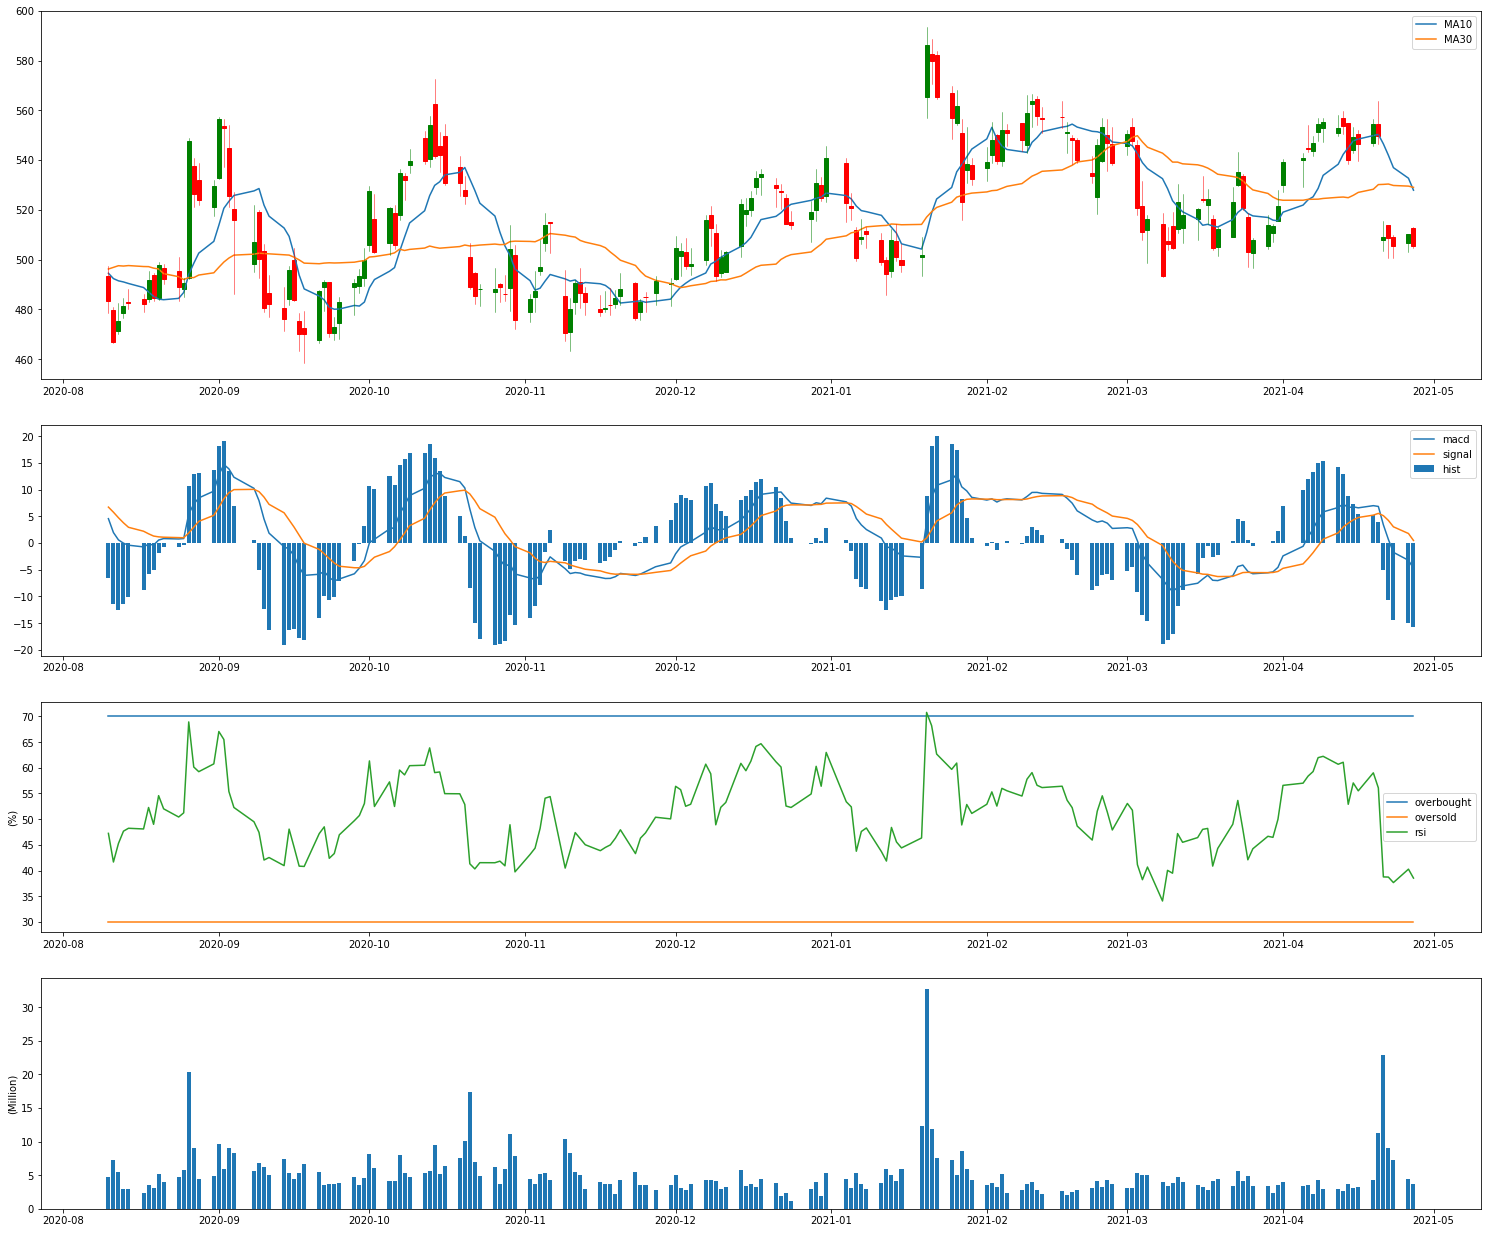

In [16]:
plot_chart(nflx_df2, 180, "NFLX")